## Marketing Segementation project

# Features of Dataset
* **CUSTID**: Identification of Credit Card holder 
* **BALANCE**: Balance amount left in customer's account to 
make purchases
* **BALANCE_FREQUENCY**: How frequently the Balance is 
updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES**: Amount of purchases made from account
* **ONEOFFPURCHASES**: Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
* **CASH_ADVANCE**: Cash in advance given by the user
* **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASES_FREQUENCY**: How frequently 
the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFF_PURCHASES_FREQUENCY**: How 
frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASH_ADVANCE_FREQUENCY**: How 
frequently the cash in advance being paid
* **CASH_ADVANCE_TRX**: Number of Transactions made with "Cash in Advance"
* **PURCHASES_TRX**: Number of purchase 
transactions made
* **CREDIT_LIMIT**: Limit of Credit Card for user
* **PAYMENTS**: Amount of Payment done by user
* **MINIMUM_PAYMENTS**: Minimum amount of 
payments made by user  
* **PRC_FULL_PAYMENT**: Percent of full payment paid by user
* **TENURE**: Tenure of credit card service for user

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
data = pd.read_csv('/content/drive/MyDrive/machine learning/marketing_department/Marketing_data.csv')

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Let's see who made one off purchase of $40761.250000
data[data['ONEOFF_PURCHASES'] == 40761.250000]

#From Below we can observe that the customer did't do cash advance txn. Also mostly he is doing full payment and he is loyal customer. So we  \
#can target such a customer for cash advance txn

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
data[data['CASH_ADVANCE'] == data['CASH_ADVANCE'].max()]

#This customer made 123 cash advance txn
# Never paid credit card in full

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


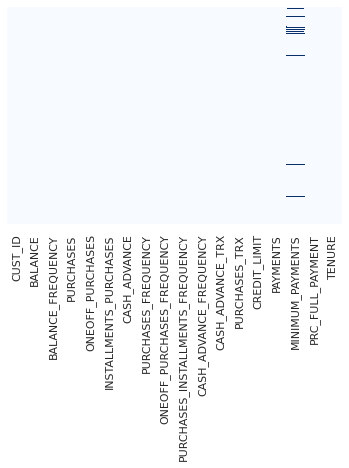

In [7]:
# Let's see if any null records in data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [8]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

###### Fill up the missing values  with mean for both MINIMUM_PAYMENTS and CREDIT_LIMIT

In [9]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

Yeah.....We made it filled all null elements

In [10]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Remove Unwanted Columns from Data
* Before Removing unwanted column first confirm there are no any duplicate records present in the data

In [11]:
data.duplicated().sum()

0

In [12]:
data.drop(['CUST_ID'],inplace=True,axis=1)

In [13]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
n = len(data.columns)
n

17

In [15]:
cols = data.columns
cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

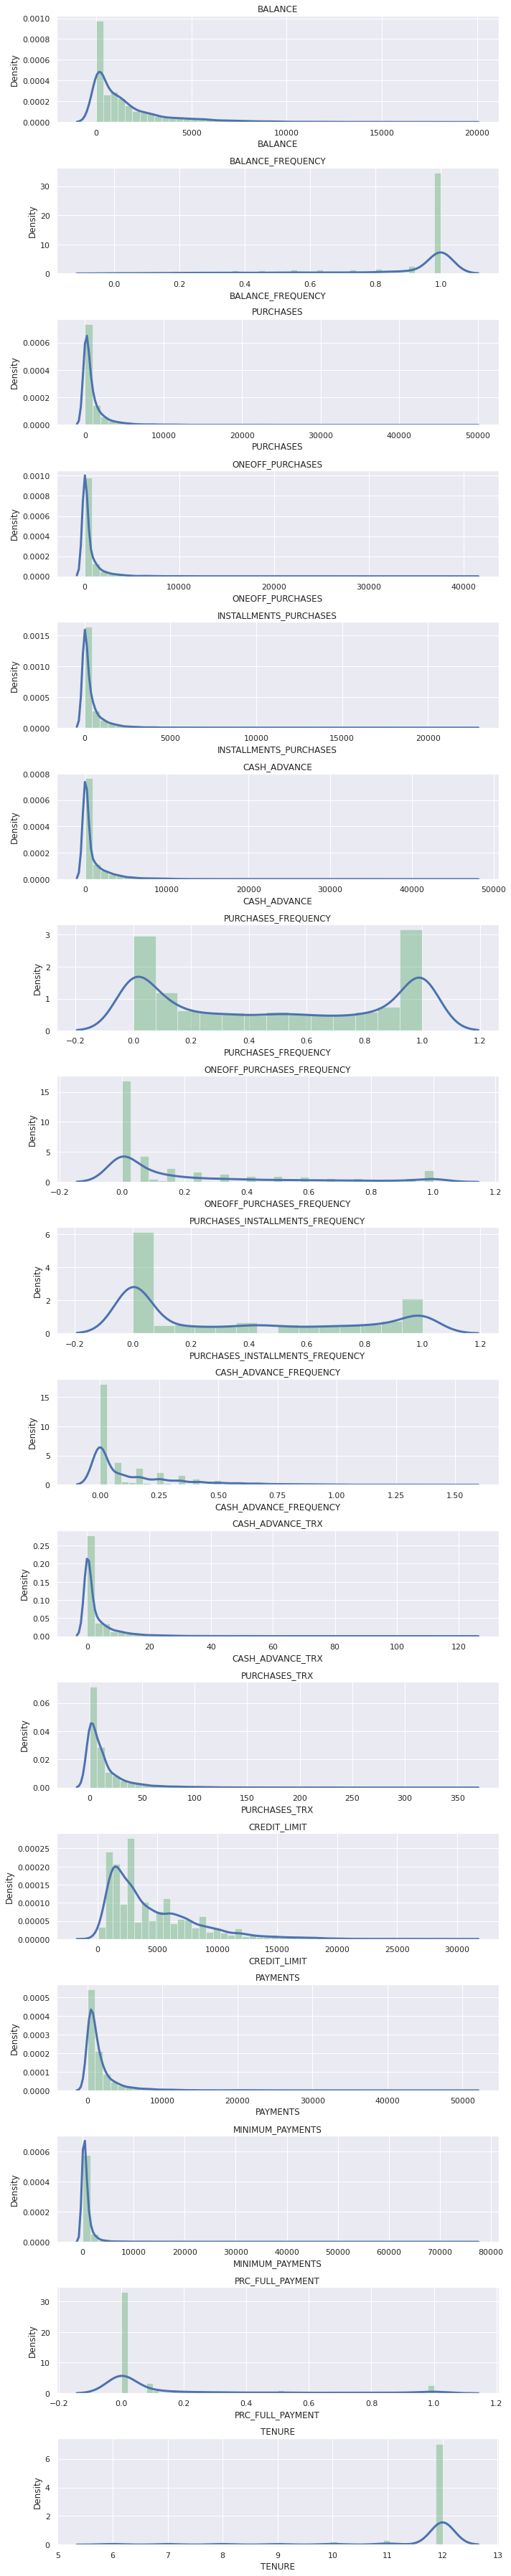

In [16]:
plt.figure(figsize=(10,50))
for i in range(len(data.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(data[data.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
  plt.title(data.columns[i])
plt.tight_layout()

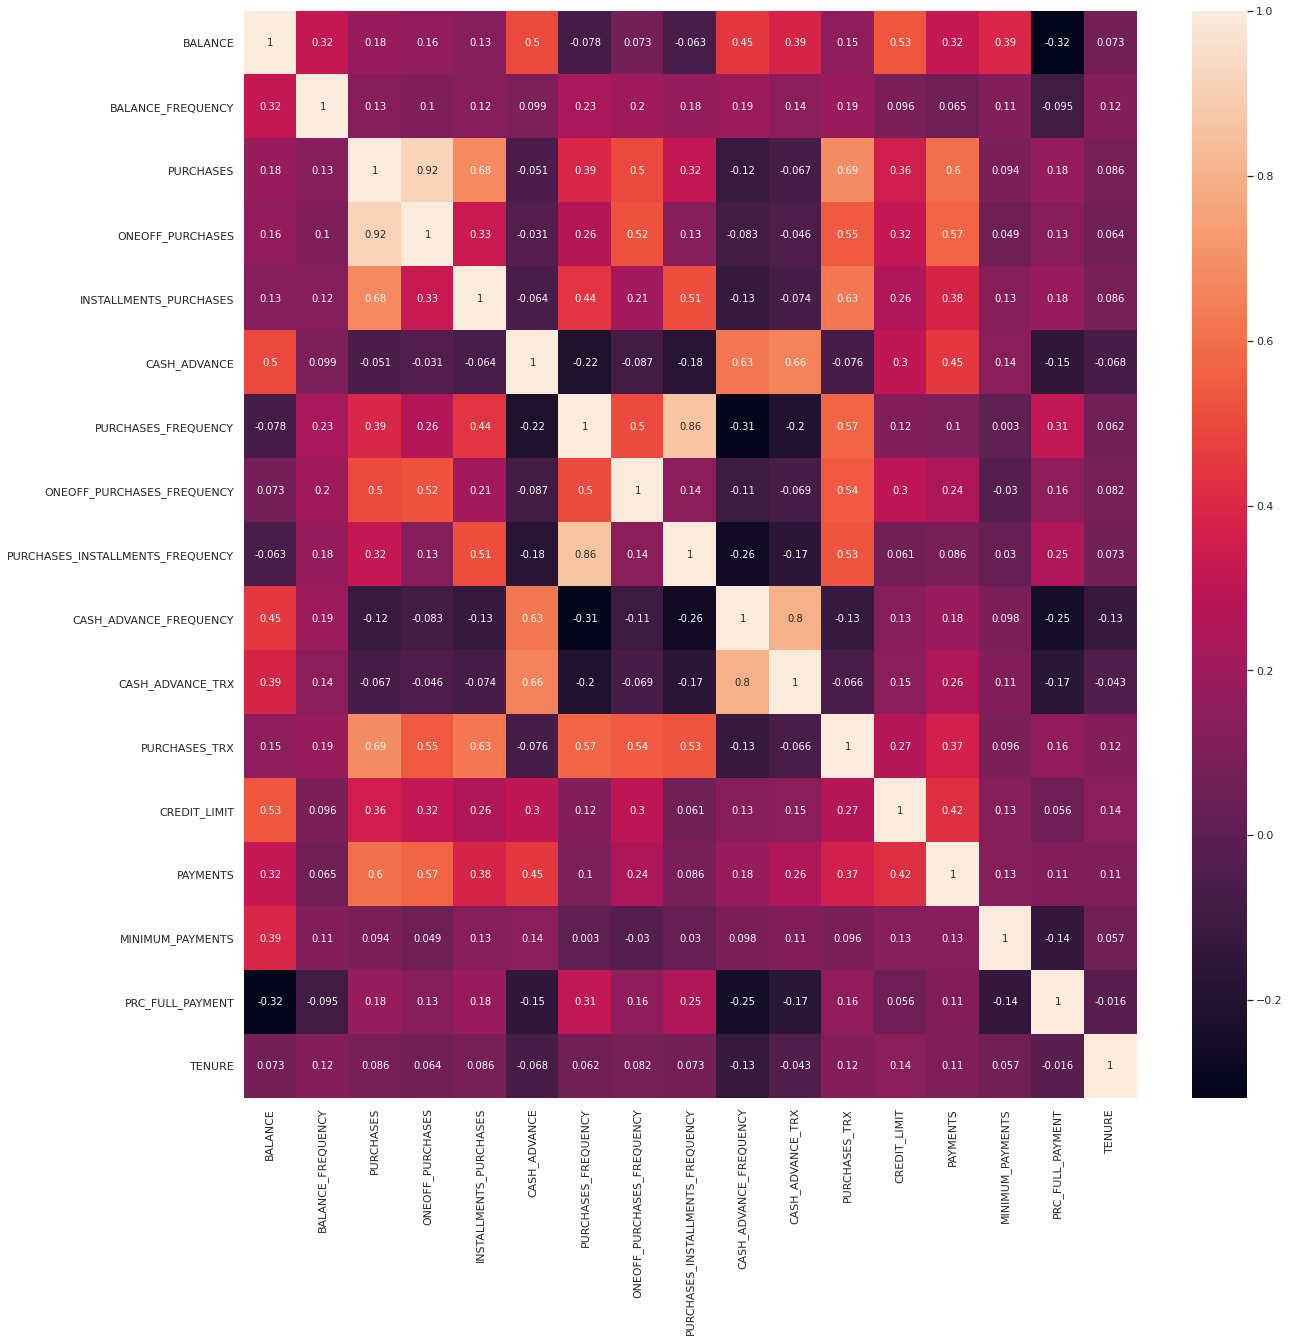

In [17]:
correlation = data.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation,annot=True);

### Correlations between our features
* From Above heatmap we can conclude below:

1.   There is Strong correlation between PURCHASES_FREQ. and PURCHASE_INSTALLMENT_FREQ.
2.   Similary for CASH_ADVANCE and CASH_ADVANCE_FREQ. having string correlation with each other
3.   Payments and Purchase also having Strong correlation



## Find Optimal number of cluster before applying K-Means

In [18]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

## Find Optimal Number of Cluster Using Elbow Method:-

- The elbow method is a heuristic method of interpretation and 

---

validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [19]:

score_1 = []
range_values = range(1,20)

for i in tqdm(range_values):
  print(f'[Start] Kmeans Applied and No. of Clusters : {i}')
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_scaled)

  score_1.append(kmeans.inertia_)

  0%|          | 0/19 [00:00<?, ?it/s]

[Start] Kmeans Applied and No. of Clusters : 1
[Start] Kmeans Applied and No. of Clusters : 2


 11%|█         | 2/19 [00:00<00:02,  5.97it/s]

[Start] Kmeans Applied and No. of Clusters : 3


 16%|█▌        | 3/19 [00:00<00:03,  5.17it/s]

[Start] Kmeans Applied and No. of Clusters : 4


 21%|██        | 4/19 [00:00<00:03,  3.94it/s]

[Start] Kmeans Applied and No. of Clusters : 5


 26%|██▋       | 5/19 [00:01<00:03,  3.53it/s]

[Start] Kmeans Applied and No. of Clusters : 6


 32%|███▏      | 6/19 [00:01<00:04,  2.71it/s]

[Start] Kmeans Applied and No. of Clusters : 7


 37%|███▋      | 7/19 [00:02<00:05,  2.28it/s]

[Start] Kmeans Applied and No. of Clusters : 8


 42%|████▏     | 8/19 [00:02<00:05,  2.20it/s]

[Start] Kmeans Applied and No. of Clusters : 9


 47%|████▋     | 9/19 [00:03<00:05,  1.96it/s]

[Start] Kmeans Applied and No. of Clusters : 10


 53%|█████▎    | 10/19 [00:04<00:05,  1.71it/s]

[Start] Kmeans Applied and No. of Clusters : 11


 58%|█████▊    | 11/19 [00:05<00:05,  1.44it/s]

[Start] Kmeans Applied and No. of Clusters : 12


 63%|██████▎   | 12/19 [00:06<00:05,  1.18it/s]

[Start] Kmeans Applied and No. of Clusters : 13


 68%|██████▊   | 13/19 [00:07<00:05,  1.12it/s]

[Start] Kmeans Applied and No. of Clusters : 14


 74%|███████▎  | 14/19 [00:08<00:04,  1.06it/s]

[Start] Kmeans Applied and No. of Clusters : 15


 79%|███████▉  | 15/19 [00:09<00:04,  1.04s/it]

[Start] Kmeans Applied and No. of Clusters : 16


 84%|████████▍ | 16/19 [00:11<00:03,  1.09s/it]

[Start] Kmeans Applied and No. of Clusters : 17


 89%|████████▉ | 17/19 [00:12<00:02,  1.17s/it]

[Start] Kmeans Applied and No. of Clusters : 18


 95%|█████████▍| 18/19 [00:14<00:01,  1.29s/it]

[Start] Kmeans Applied and No. of Clusters : 19


100%|██████████| 19/19 [00:15<00:00,  1.23it/s]


* From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
* However, the values does not reduce linearly until 8th cluster. 
* Let's choose the number of clusters to be 7.

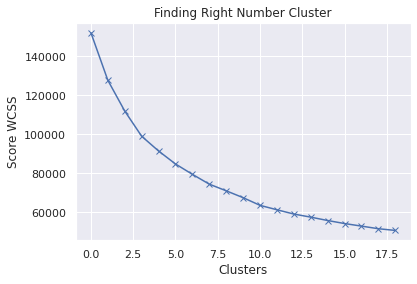

In [20]:
plt.plot(score_1,'bx-')
plt.title('Finding Right Number Cluster')
plt.xlabel('Clusters')
plt.ylabel('Score WCSS');

## Apply KMeans Method

In [21]:
kmeans =KMeans(n_clusters=8)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [22]:
labels

array([3, 1, 7, ..., 2, 2, 2], dtype=int32)

In [23]:
kmeans.cluster_centers_.shape

(8, 17)

In [24]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[data.columns])

In [25]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.759505,0.472979,2.059428,1.724934,1.700517,-0.212392,1.155114,1.732699,1.076576,-0.309840,-0.227119,2.435537,1.161343,1.135983,0.327882,0.221366,0.317045
1,1.671708,0.393477,-0.214070,-0.147241,-0.235718,2.025109,-0.463224,-0.173188,-0.424020,1.928633,1.944311,-0.262466,1.022597,0.828583,0.548604,-0.390869,0.068168
2,-0.332825,-0.344129,-0.287118,-0.205018,-0.301852,0.072498,-0.196537,-0.269970,-0.234654,0.313908,0.002881,-0.385982,-0.563404,-0.392199,-0.205867,-0.035486,-3.194122
3,0.021322,0.402162,-0.361845,-0.241423,-0.411915,-0.081934,-0.891108,-0.401794,-0.791848,0.127897,-0.013795,-0.492452,-0.296489,-0.246705,-0.010079,-0.453582,0.270966
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,-0.699534,-2.208484,-0.323305,-0.242788,-0.318262,-0.313071,-0.583253,-0.457920,-0.454718,-0.510542,-0.368319,-0.429053,-0.202470,-0.207012,-0.253174,0.092539,0.196651
6,-0.690548,0.117532,0.139731,0.010049,0.311464,-0.449105,0.900160,0.361379,0.720976,-0.643356,-0.458610,0.230892,0.148021,-0.109290,-0.292342,2.168094,0.189768
7,-0.159512,0.398964,0.039917,-0.049294,0.184865,-0.325050,0.929435,0.250324,0.836399,-0.393479,-0.315351,0.246879,-0.178947,-0.161332,0.009869,-0.334555,0.288355


In [26]:
# In order to understand what this number means,let's perform inverse transformation

cluster_centers = sc.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3145.320643,0.989315,5403.203942,3455.474781,1948.824051,533.475588,0.953954,0.719355,0.792296,0.073142,1.698905,75.248175,8719.890511,5021.703229,1628.322002,0.218460,11.941606
1,5043.993635,0.970482,545.840416,348.046824,197.910993,5225.618362,0.304436,0.150792,0.195921,0.521083,16.517321,8.185912,8215.074533,4131.809357,2142.705070,0.039392,11.608545
2,871.727207,0.795750,389.773601,252.149727,138.106190,1130.903517,0.411471,0.121920,0.271180,0.197960,3.268489,5.115756,2444.556993,597.766825,384.441450,0.143336,7.242765
3,1608.855066,0.972539,230.116857,191.725258,38.577855,807.051246,0.132706,0.082595,0.049737,0.160738,3.154686,2.469326,3415.700665,1018.957179,840.718062,0.021050,11.879940
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,108.453998,0.354101,312.457660,189.458473,123.267299,322.346247,0.256263,0.065851,0.183721,0.032979,0.735321,4.045167,3757.781793,1133.865105,274.195739,0.180781,11.780488
6,127.156652,0.905113,1301.741713,609.116117,692.720255,37.077642,0.851628,0.310264,0.650971,0.006402,0.119149,20.448936,5033.010155,1416.759496,182.915211,0.787845,11.771277
7,1232.464761,0.971782,1088.488550,510.618647,578.238849,297.226407,0.863378,0.277134,0.696844,0.056405,1.096789,20.846330,3843.368316,1266.104557,887.205627,0.055863,11.903211


In [27]:
labels.shape

(8950,)

In [28]:
labels.max()

7

In [29]:
labels.min()

0

In [30]:
data_cluster = pd.concat([data,pd.DataFrame({'cluster':labels})],axis=1)

In [31]:
data_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


* First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
* Second customers cluster (revolvers) who use credit card as a loan : highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
* Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
* Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

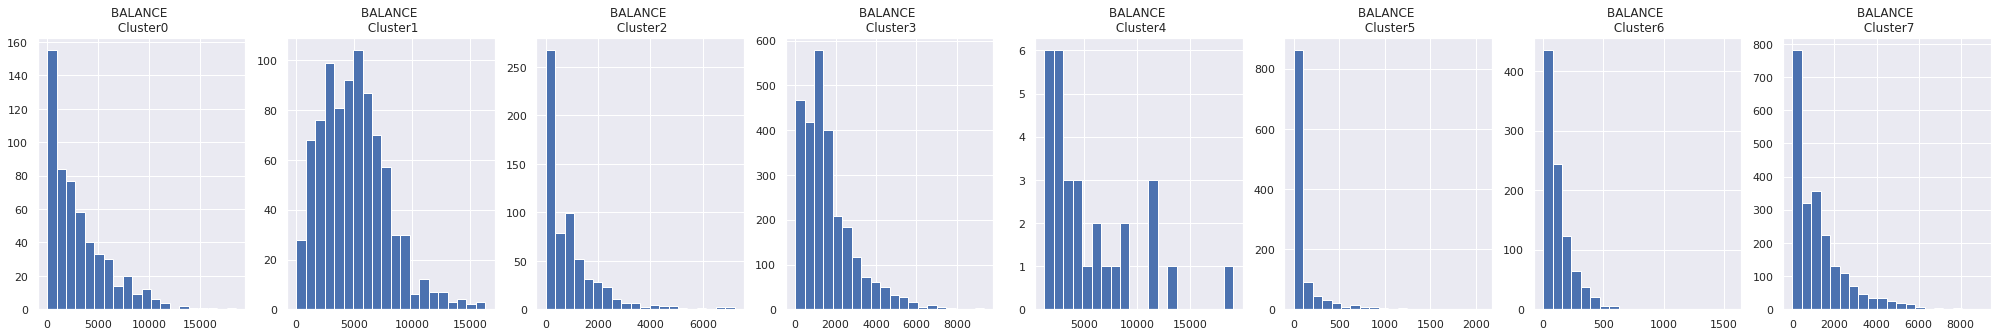

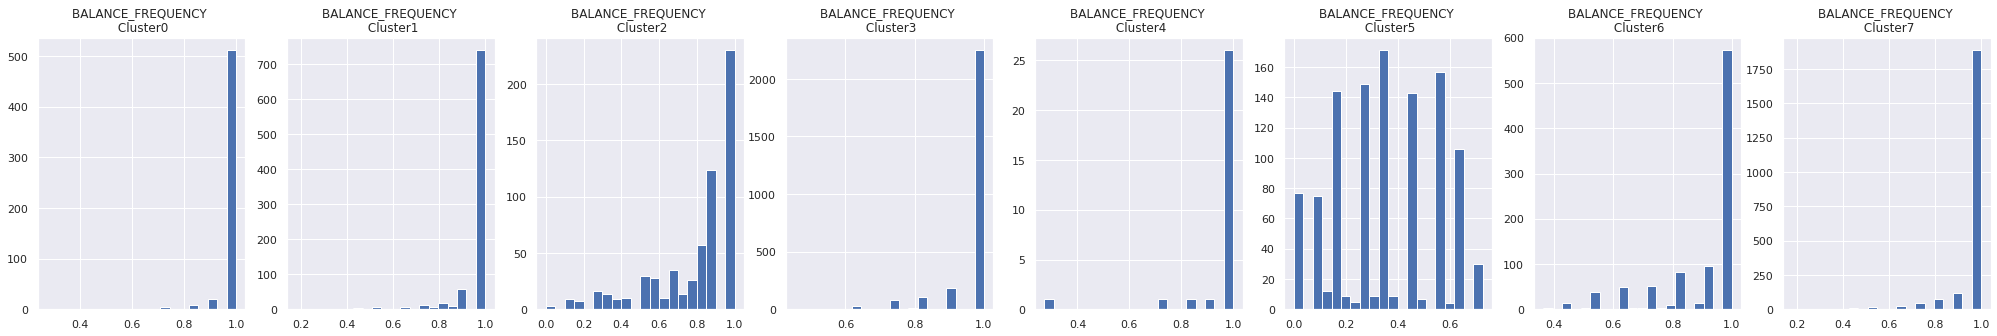

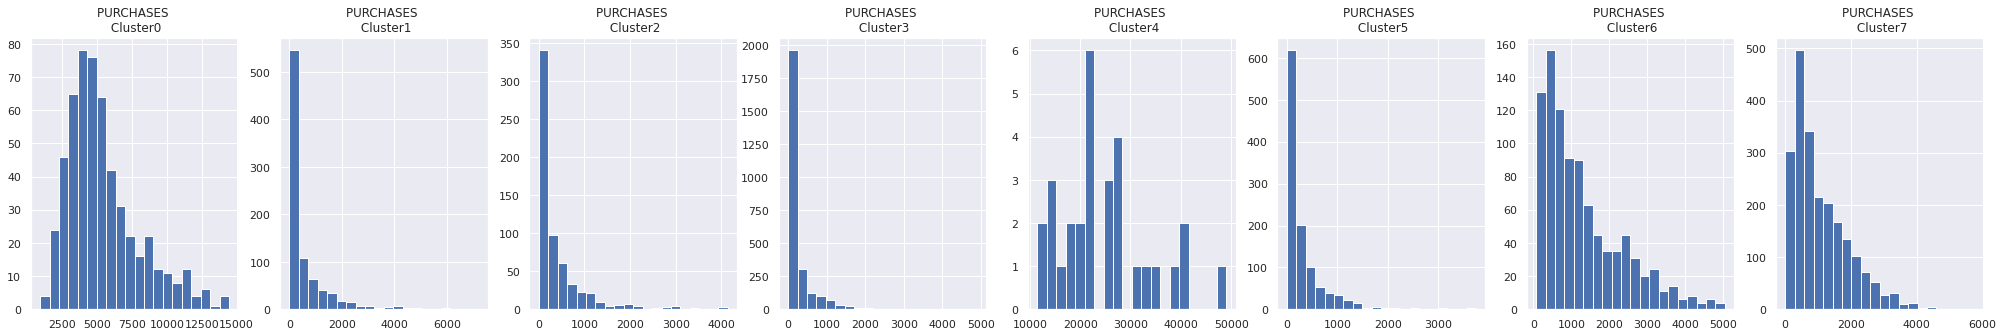

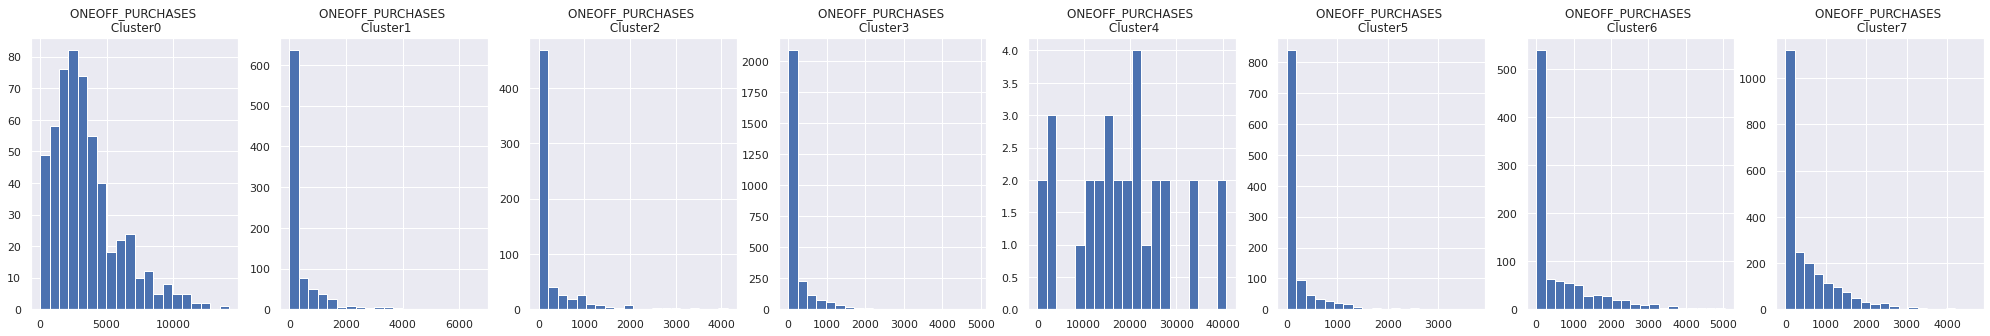

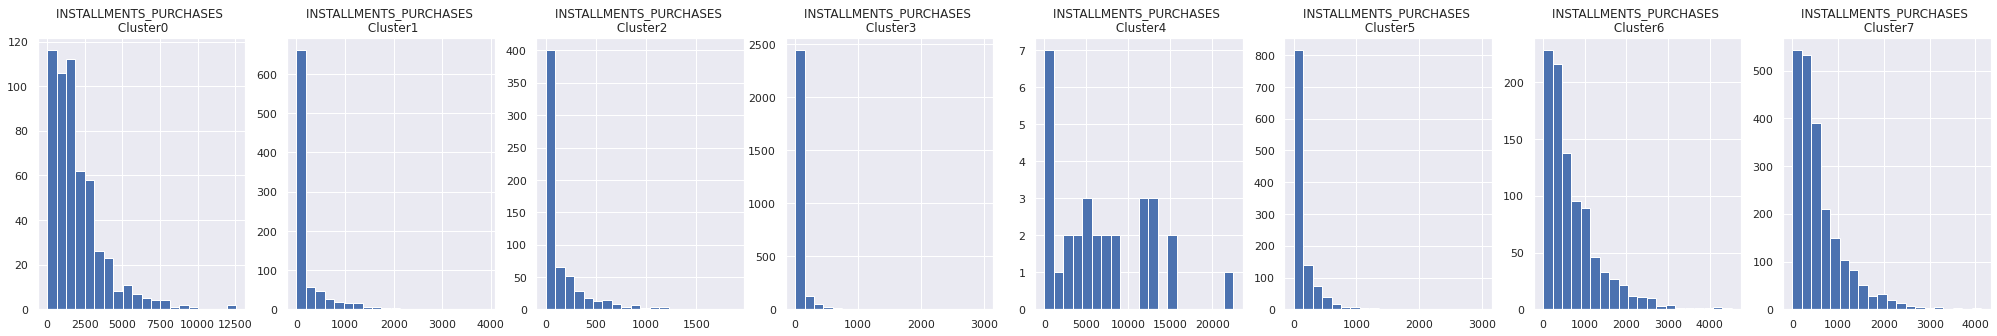

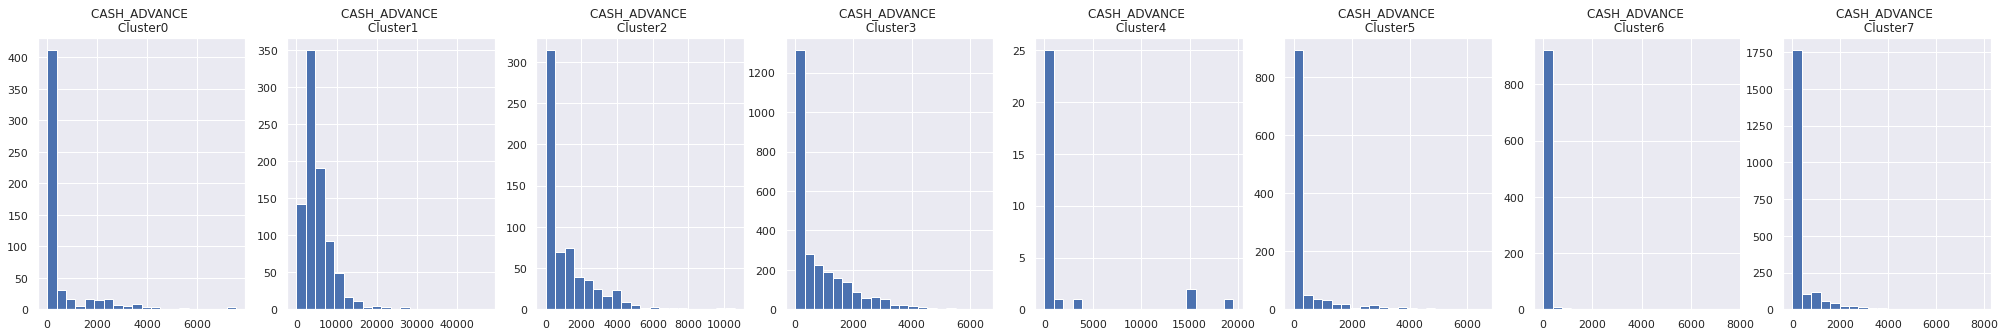

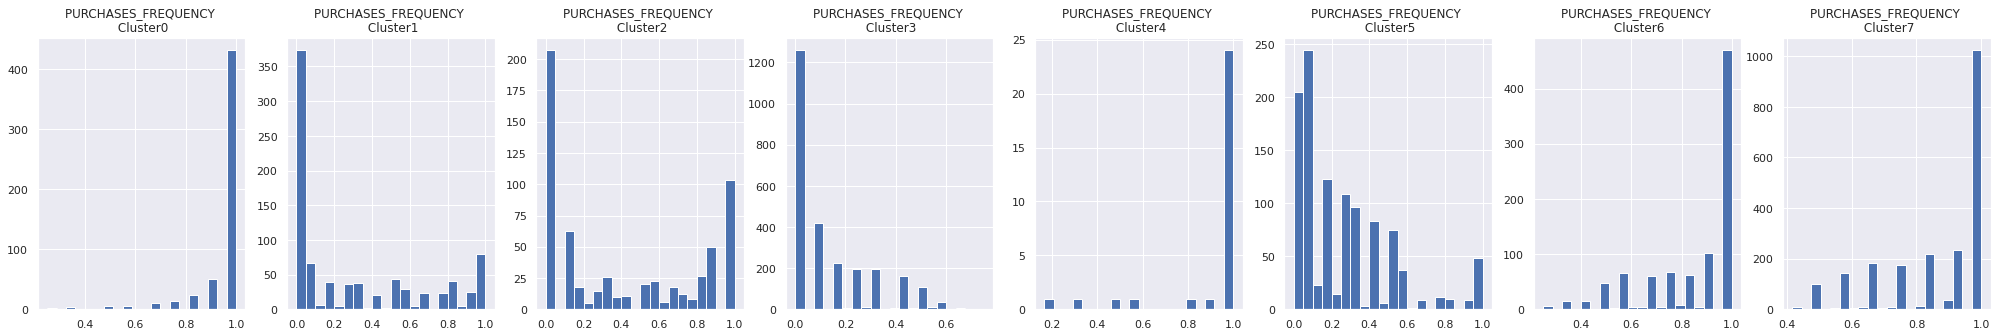

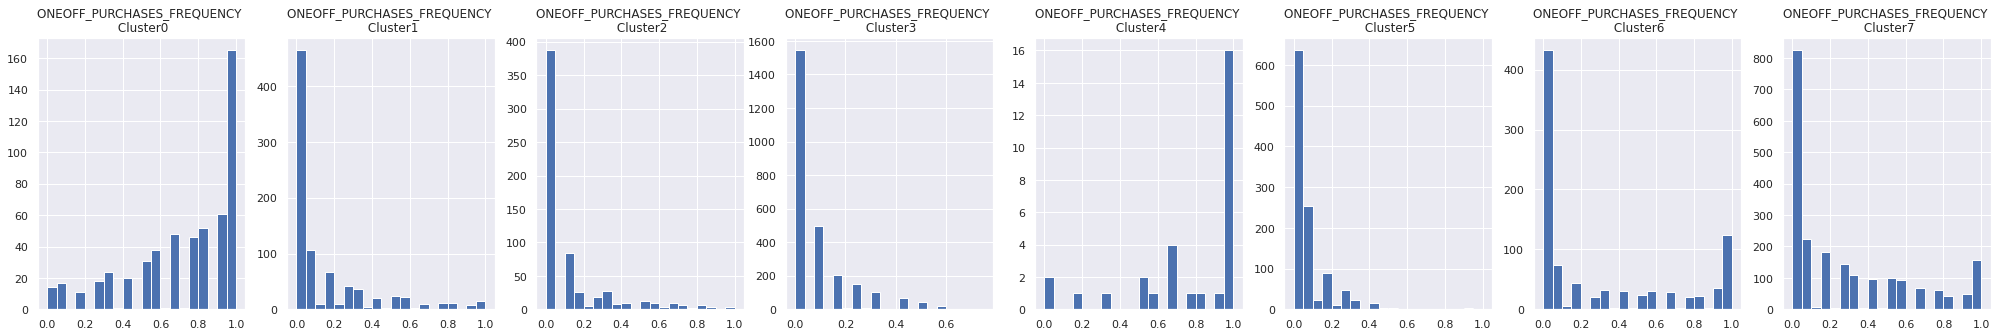

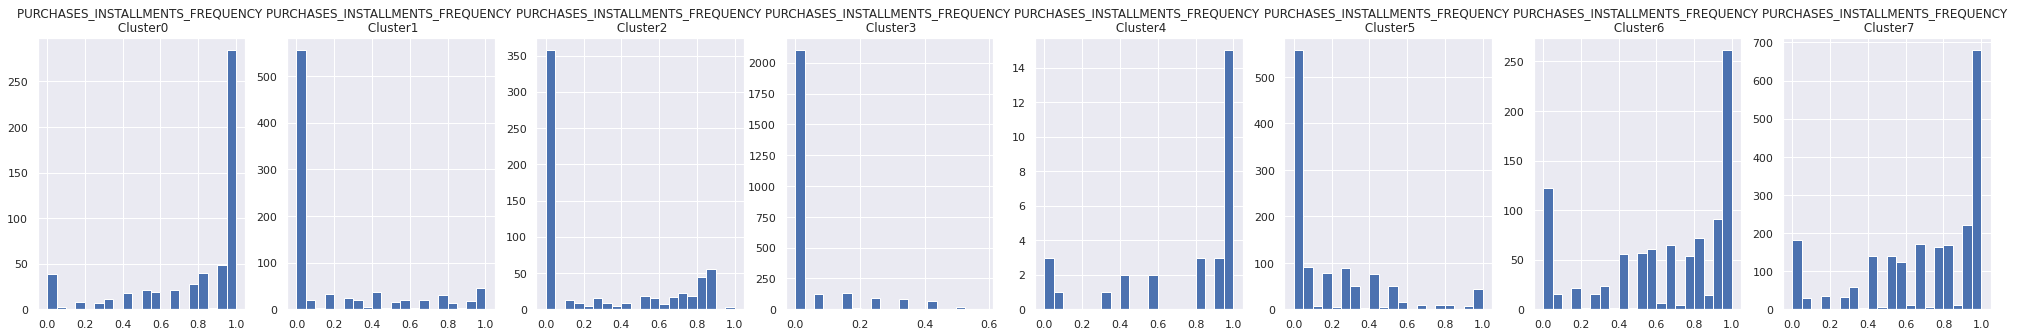

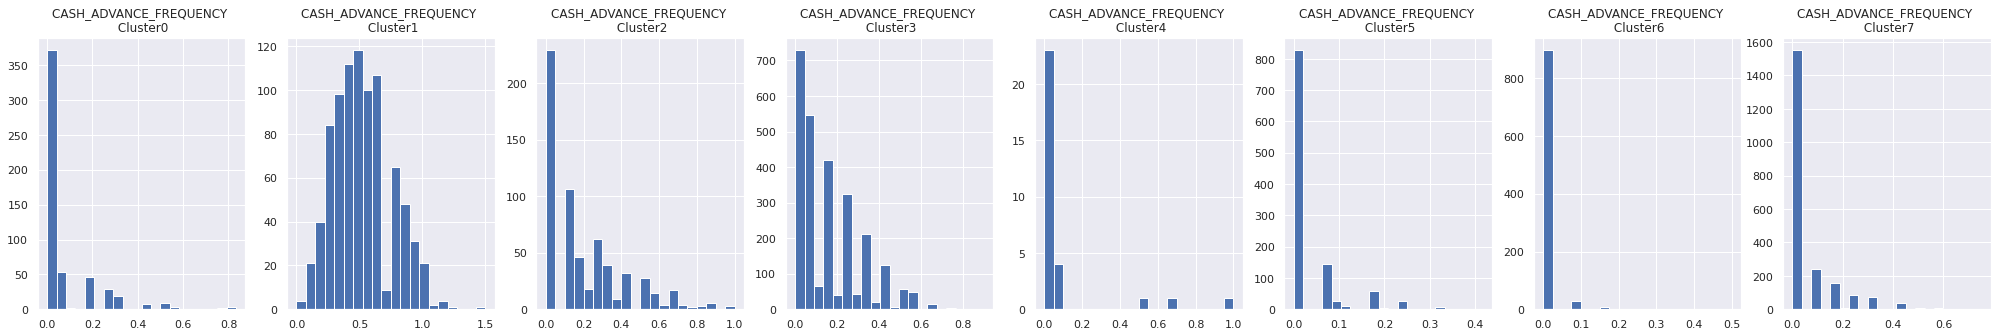

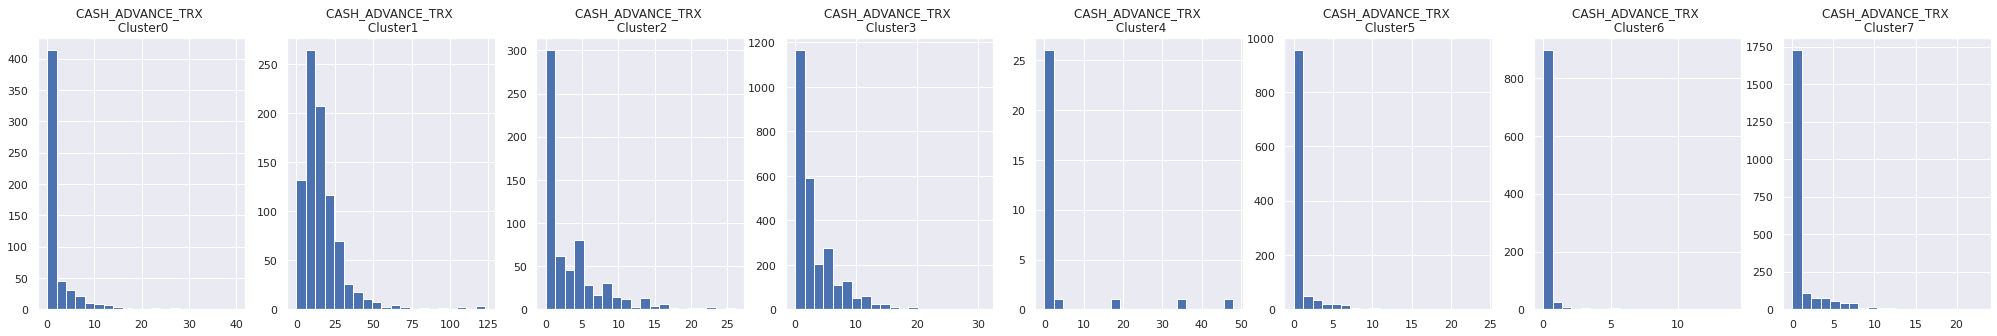

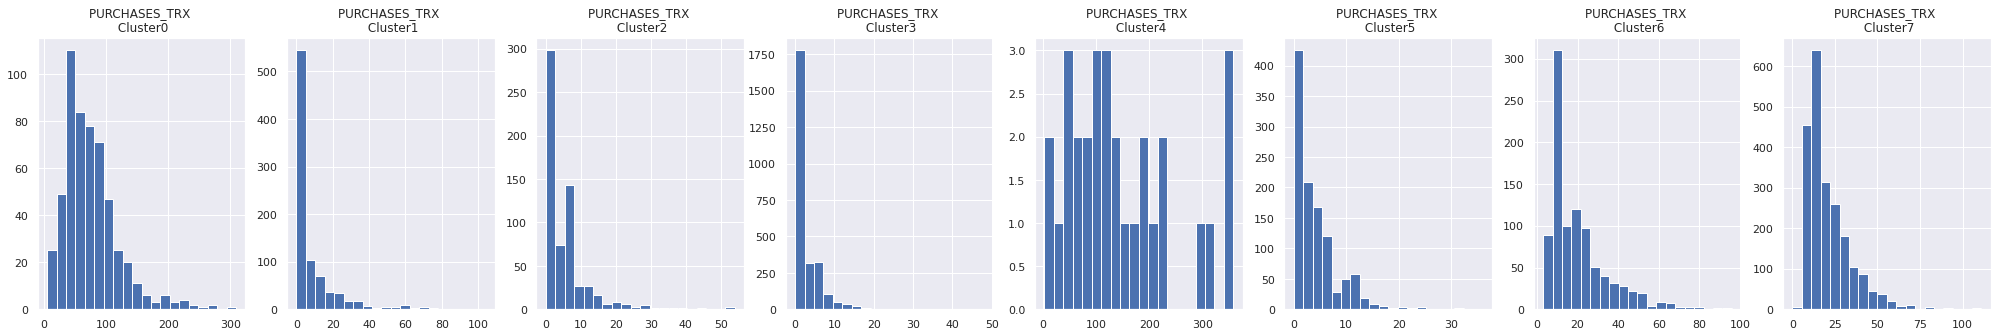

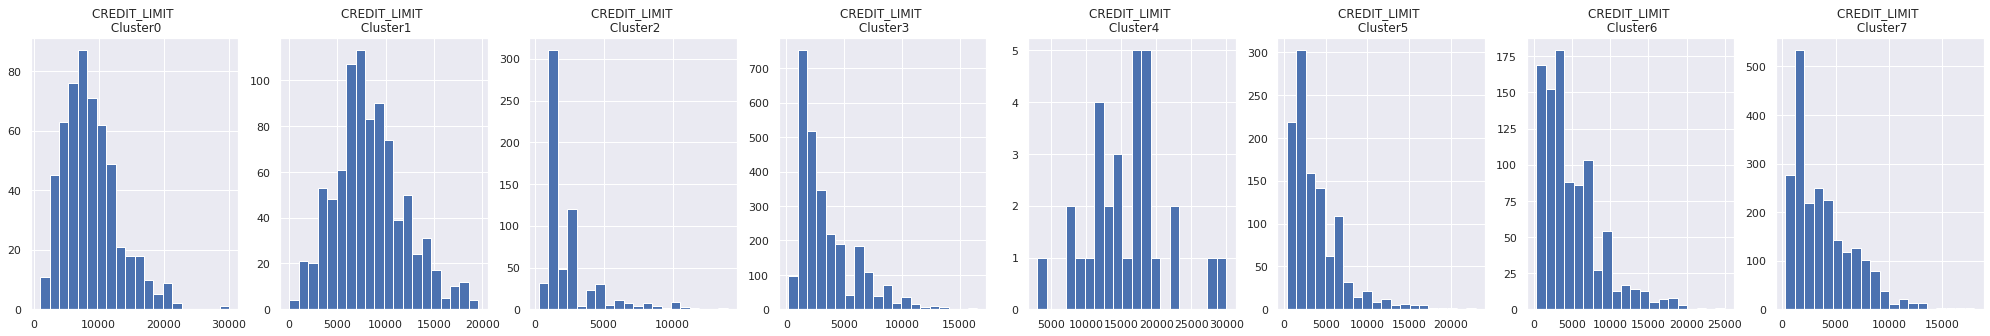

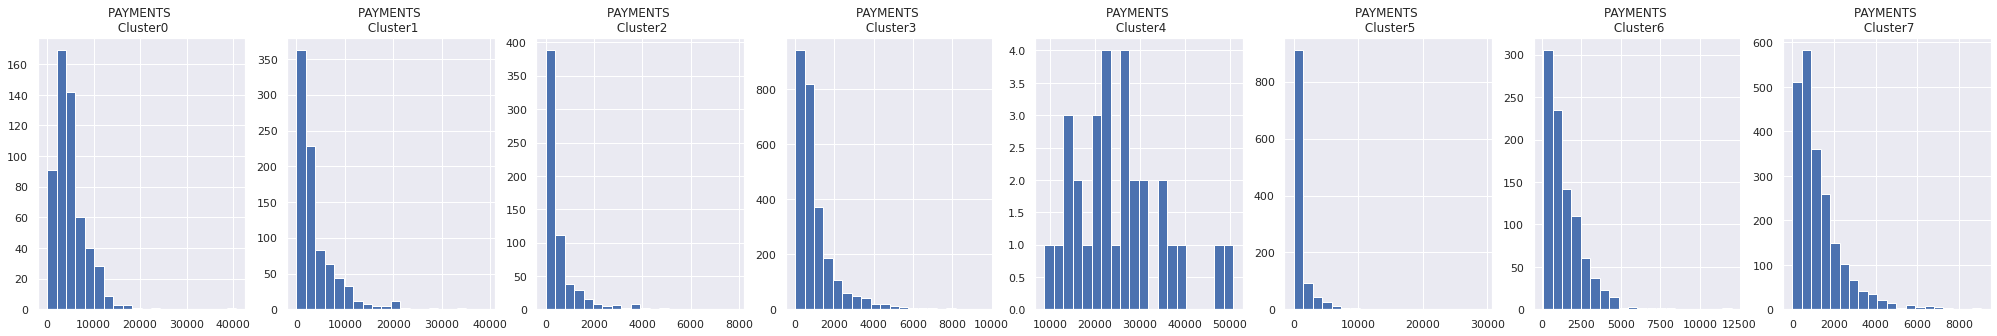

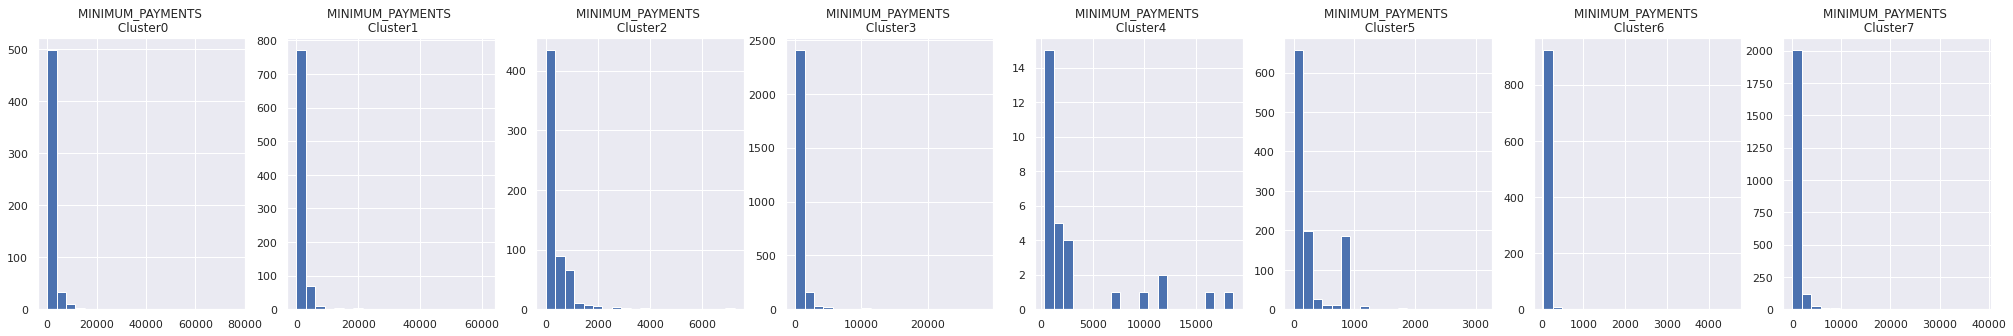

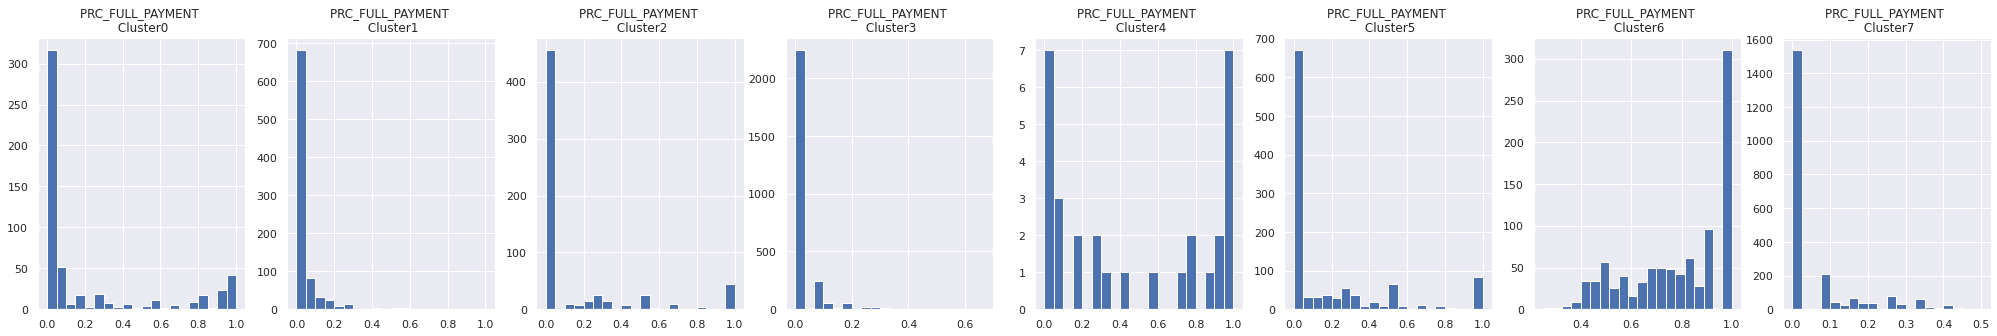

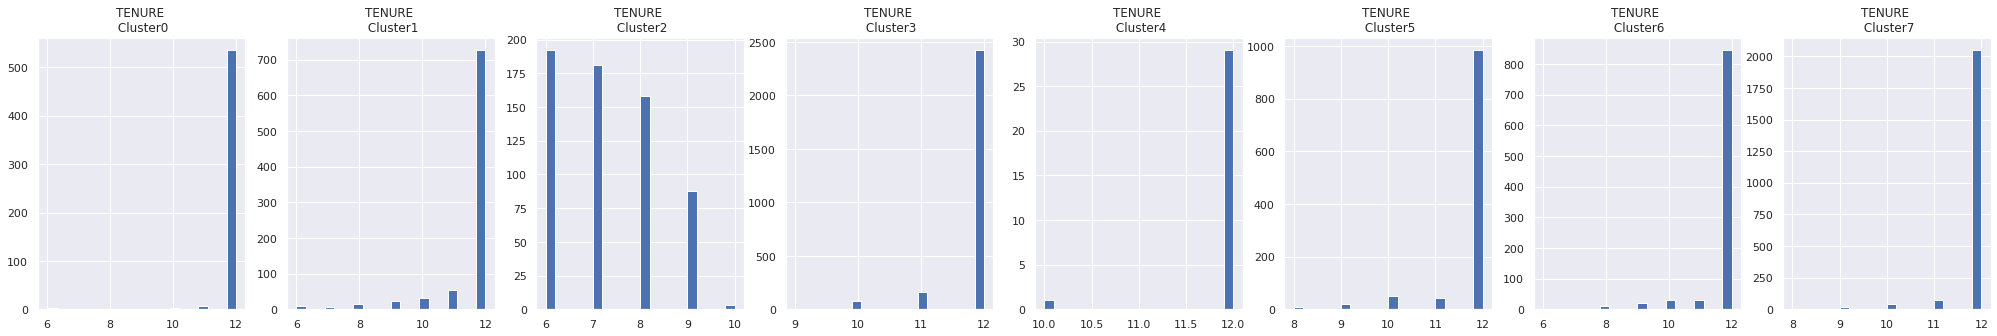

In [32]:
for i in data.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = data_cluster[data_cluster['cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title('{} \n Cluster{}'.format(i,j))
plt.show()

## Apply Pricipal Component Analysis And viusalize Results

In [33]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data_scaled)
principal_comp

array([[-1.68222011, -1.07644572],
       [-1.13830104,  2.50648749],
       [ 0.96968703, -0.38351574],
       ...,
       [-0.92620193, -1.8107872 ],
       [-2.33655098, -0.65797031],
       [-0.55642286, -0.4004768 ]])

In [35]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076446
1,-1.138301,2.506487
2,0.969687,-0.383516
3,-0.873625,0.043180
4,-1.599435,-0.688581


## Visualize the cluster

In [36]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076446,3
1,-1.138301,2.506487,1
2,0.969687,-0.383516,7
3,-0.873625,0.043180,3
4,-1.599435,-0.688581,3


In [42]:
pca_df.cluster.unique()

array([3, 1, 7, 0, 5, 2, 6, 4], dtype=int32)

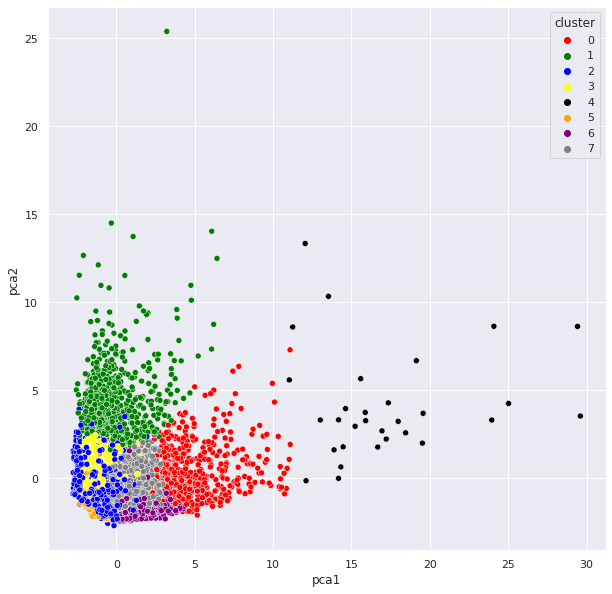

In [43]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','yellow','black','orange','purple','gray'])

## Unsupervised Leanring by Using AutoEncoders

In [44]:
from tensorflow.keras.layers import Input,Add,Dense
from tensorflow.keras.layers import Activation,ZeroPadding2D,BatchNormalization
from tensorflow.keras.layers import Flatten,Conv2D,AveragePooling2D,MaxPooling2D
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import  SGD

In [49]:
encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [50]:
data_scaled.shape

(8950, 17)

In [51]:
autoencoder.fit(data_scaled,data_scaled,
                batch_size=128,
                epochs=25,
                verbose=1)

Epoch 1/25
70/70 [==============================] - 3s 39ms/step - loss: 0.7788
Epoch 2/25
70/70 [==============================] - 3s 39ms/step - loss: 0.3681
Epoch 3/25
70/70 [==============================] - 3s 39ms/step - loss: 0.2728
Epoch 4/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1793
Epoch 5/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1668
Epoch 6/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1498
Epoch 7/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1302
Epoch 8/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1449
Epoch 9/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1126
Epoch 10/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1206
Epoch 11/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1066
Epoch 12/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1059
Epoch 13/25
70/70 [==================

In [52]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_8 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_10 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_12 (Dense)             (None, 2000)              2200

In [54]:
pred = encoder.predict(data_scaled)

In [56]:
pred.shape

(8950, 10)

100%|██████████| 19/19 [00:15<00:00,  1.26it/s]


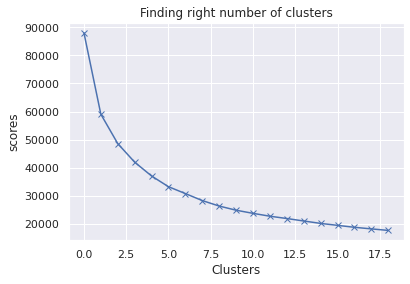

In [58]:
scores_2 = []

range_values = range(1, 20)

for i in tqdm(range_values):
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

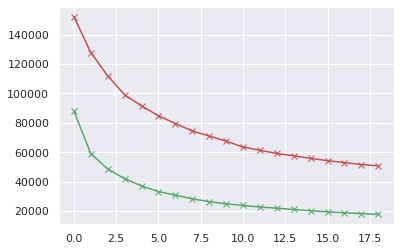

In [60]:
plt.plot(score_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [62]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(data_scaled)

In [63]:
df_cluster_dr = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [64]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.282676,0.104856
1,2.614134,1.991121
2,2.427092,-0.752747
3,0.591896,-0.052617
4,-1.789593,0.201272


In [65]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.282676,0.104856,2
1,2.614134,1.991121,0
2,2.427092,-0.752747,1
3,0.591896,-0.052617,1
4,-1.789593,0.201272,2


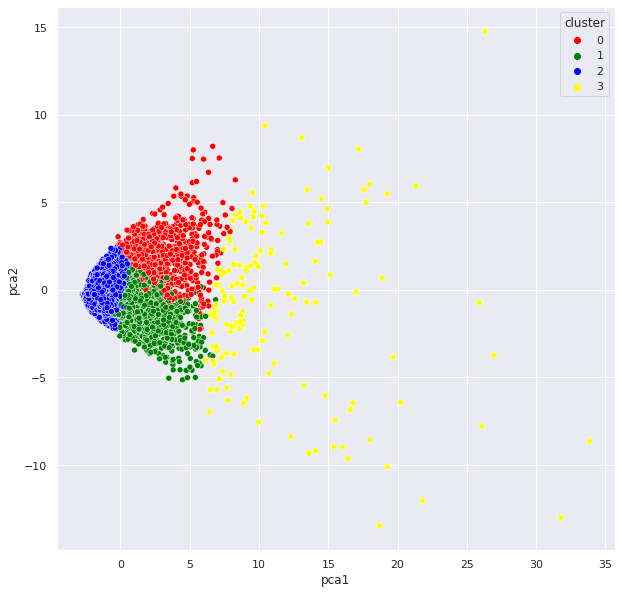

In [66]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()